The purpose of the model is to predict the future prices of Bitcoin based on historical data and other relevant features. Bitcoin, like many other cryptocurrencies, is a highly volatile and unpredictable asset. Predicting its price movements accurately can be challenging, but it's crucial for traders, investors, and businesses that rely on Bitcoin.

**We use Python as the language for predicting Bitcoin prices using an RNN with GRU or LSTM cells**

In [44]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
# functions to help out with predictions

def rmse_return(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

#Collecting data:
Collecting the Data from https://www.cryptodatadownload.com/data/bitstamp/
so that it update every time we run the code



In [46]:
dataset = pd.read_csv("https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_d.csv",header=1)
dataset

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1682380800,2023-04-25 00:00:00,BTC/USD,27515.00,27525.00,27509.00,27521.00,1.026468e+00,2.824943e+04
1,1682294400,2023-04-24 00:00:00,BTC/USD,27594.00,27998.00,26981.00,27512.00,2.236655e+03,6.153485e+07
2,1682208000,2023-04-23 00:00:00,BTC/USD,27820.00,27820.00,27347.00,27596.00,7.980455e+02,2.202286e+07
3,1682121600,2023-04-22 00:00:00,BTC/USD,27253.00,27883.00,27137.00,27817.00,1.010447e+03,2.810761e+07
4,1682035200,2023-04-21 00:00:00,BTC/USD,28240.00,28362.00,27140.00,27254.00,2.455900e+03,6.693309e+07
...,...,...,...,...,...,...,...,...,...
3066,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
3067,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
3068,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
3069,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [47]:
dataset1=dataset.copy()

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        3071 non-null   int64  
 1   date        3071 non-null   object 
 2   symbol      3071 non-null   object 
 3   open        3071 non-null   float64
 4   high        3071 non-null   float64
 5   low         3071 non-null   float64
 6   close       3071 non-null   float64
 7   Volume BTC  3071 non-null   float64
 8   Volume USD  3071 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 216.1+ KB


In [49]:
dataset.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [50]:
dataset.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,3.071000e+03,3071.000000,3071.000000,3071.000000,3071.000000,3.071000e+03,3.071000e+03
mean,1.549757e+09,13553.102582,13925.032885,13130.324796,13561.991358,1.148172e+07,6.028540e+07
std,7.660791e+07,16106.236023,16545.061375,15588.910001,16106.860750,4.404730e+07,1.011728e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.483445e+09,893.635000,911.235000,873.000000,894.310000,3.562844e+03,1.160406e+04
50%,1.549757e+09,7617.980000,7817.000000,7394.090000,7618.110000,9.689689e+03,2.946893e+07
75%,1.616069e+09,19379.565000,19707.500000,18984.605000,19391.790000,2.668951e+06,7.811665e+07
max,1.682381e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


#Data Preprocessing
Overall, we need to write a code that will extracting the date from the date column of the dataset, converting it to a datetime format, changing its format, and setting it as the index of the dataset.

In [51]:
date_df=[]
Date=dataset.date.str.split(" ")  # splitting date when space is encountered
for i in Date:
  date_df.append(i[0])

In [52]:
dataset.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')

In [53]:
dataset.drop(columns=[ 'unix', 'date', 'symbol', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],inplace=True)

In [54]:
data_df=pd.concat([pd.DataFrame(date_df,columns=["Date"]),dataset],axis=1)
data_df.columns=["Date", 'Open']


In [55]:
data_df.Date = pd.to_datetime(data_df.Date)
data_df.Date

0      2023-04-25
1      2023-04-24
2      2023-04-23
3      2023-04-22
4      2023-04-21
          ...    
3066   2014-12-02
3067   2014-12-01
3068   2014-11-30
3069   2014-11-29
3070   2014-11-28
Name: Date, Length: 3071, dtype: datetime64[ns]

In [56]:
data_df.Date=[date.strftime(format="%Y/%m/%d") for date in data_df.Date]

In [57]:
data_df.Date = pd.to_datetime(data_df.Date)
dataset=data_df.set_index('Date')
dataset.head()

,Open
Date,
2023-04-25,27515.0
2023-04-24,27594.0
2023-04-23,27820.0
2023-04-22,27253.0
2023-04-21,28240.0


#Visualization 
we are creating a line plot using the Seaborn library to visualize the opening prices of different cryptocurrencies over time.

<AxesSubplot:xlabel='Date', ylabel='Open'>

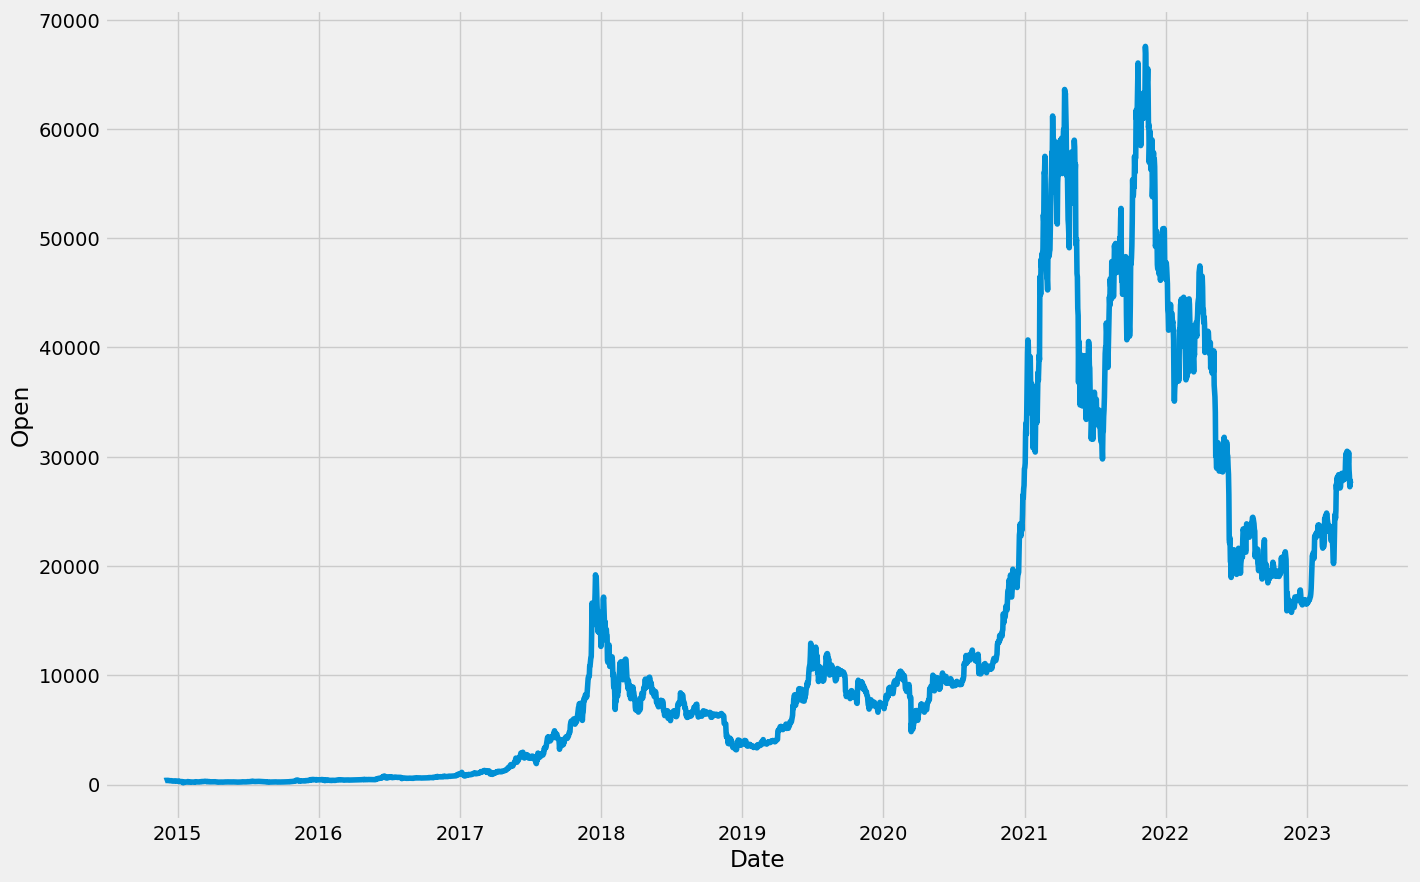

In [58]:
plt.figure(figsize=(15,10))
sns.lineplot(data=dataset,x="Date",y="Open")

## Checking stationarity in data
We can then plot the original time series data and the rolling mean data on the same plot using Matplotlib or Seaborn. If the rolling mean plot shows a stable mean over time, then the time series data is likely stationary.


In [59]:
rolling_mean_50 = dataset.rolling(50).mean()
rolling_mean_200 = dataset.rolling(200).mean()

rolling_std = dataset.rolling(50).std()

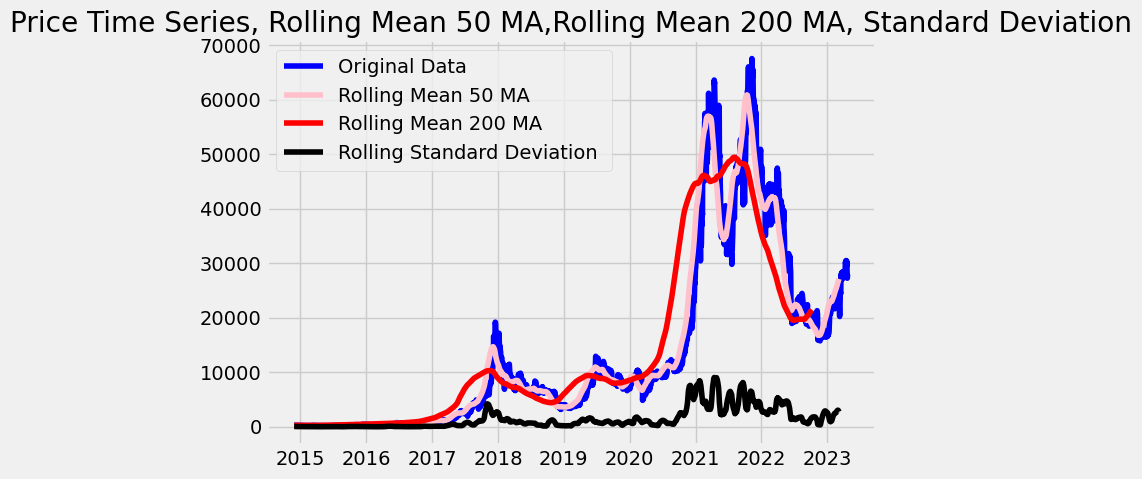

In [60]:
plt.figure(figsize=(7,5))
plt.plot(dataset, color="blue",label="Original Data")
plt.plot(rolling_mean_50, color="pink", label="Rolling Mean 50 MA ")
plt.plot(rolling_mean_200, color="red", label="Rolling Mean 200 MA ")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation ")
plt.title("Price Time Series, Rolling Mean 50 MA,Rolling Mean 200 MA, Standard Deviation")
plt.legend(loc="best")

**The mean or variance of the rolling mean plot changes over time, so the data is likely non-stationary.**

In [61]:
from statsmodels.tsa.stattools import adfuller

# Define function to check stationarity using ADF test
def check_stationarity(data):
    # Perform ADF test
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    # Check if ADF statistic is less than critical values
    if result[0] < result[4]['5%']:
        print('Data is stationary')
    else:
        print('Data is non-stationary')

# Check stationarity of time series data
check_stationarity(dataset)

ADF Statistic: -1.594402410626471
p-value: 0.48640474997982264
Critical Values:
	1%: -3.4325021961474107
	5%: -2.862490903201216
	10%: -2.5672761899734646
Data is non-stationary


**Based on the ADF test, we can conclude that the time series data is non-stationary and has a downward trend**.
 
1-**The ADF statistic** of -1.5178853943460253 indicates that the time series is trending slightly downwards. 

2-**The p-value** of 0.5246458686456562 is greater than the chosen significance level of 0.05, which means we fail to reject the null hypothesis of non-stationarity.

3- **The critical** values at the 1%, 5%, and 10% levels of significance are -3.4325114439420568, -2.862494987665022, and -2.567278364489773, respectively. 

Since the ADF statistic is greater than all of these critical values, we fail to reject the null hypothesis and conclude that the data is non-stationary. 

<Figure size 1000x700 with 0 Axes>

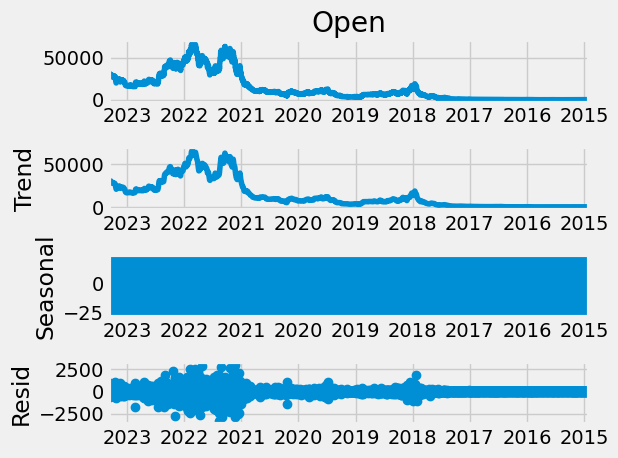

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
plt.figure(figsize=(10,7))
decompose = seasonal_decompose(dataset['Open'],model='additive', period=4)
decompose.plot()
pyplot.show()

#Split data into training and testing sets: 
Divide the preprocessed data into training and testing sets to evaluate the model's performance.

In [63]:
training_set = dataset[dataset.index.year<2023].Open
test_set = dataset[dataset.index.year>=2023].Open
print("The dataset has information from" , dataset.index.min().strftime("%d/%m/%Y"),"to date",dataset.index.max().strftime("%d/%m/%Y"))

The dataset has information from 28/11/2014 to date 25/04/2023


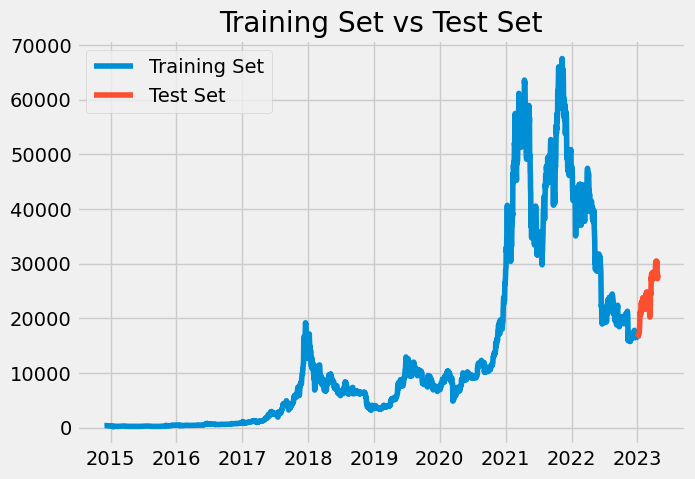

In [64]:
plt.figure(figsize=(7,5))
plt.plot(training_set, label='Training Set')
plt.plot(test_set, label='Test Set')
plt.legend()
plt.title('Training Set vs Test Set')
plt.show()

In [65]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(np.array(training_set).reshape(-1,1))

In [66]:
# Data Preparation
def picker(series,pos,days):
    return list(series[pos:pos+days]), series[pos+days],np.mean(np.array(series[pos:pos+days]))

def prepare_data(series,days):
    pos=0
    X,y=[],[]
    while pos!=len(series)-days:
        X_entry,y_entry,mean=picker(series,pos,days)
        X_entry= np.array(X_entry)
        X.append(X_entry);y.append(y_entry)

        pos+=1
    return np.array(X),np.array(y)

In [67]:
# Since RNN/GRU/LSTM store long term memory state, we create a data structure with n_days timesteps and 1 output
n_days=60
X_train,y_train=prepare_data(training_set_scaled,n_days)

In [68]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [69]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done for the 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = dataset.copy()
inputs = dataset_total[len(dataset_total)-len(test_set) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

#Train the model: 
Train the RNN model using the training data.

#Gated Recurrent Units

In [70]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(SimpleRNN(100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(SimpleRNN(100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=100, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [71]:
regressorGRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 60, 100)           10200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 100)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 60, 100)           20100     
                                                                 
 dropout_9 (Dropout)         (None, 60, 100)           0         
                                                                 
 gru_2 (GRU)                 (None, 60, 100)           60600     
                                                                 
 dropout_10 (Dropout)        (None, 60, 100)           0         
                                                                 
 gru_3 (GRU)                 (None, 100)              

##Train the model

In [72]:
# Compiling the GRU
regressorGRU.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=100,batch_size=150)

Epoch 1/100
20/20 [==============================] - 8s 98ms/step - loss: 0.0433
Epoch 2/100
20/20 [==============================] - 2s 105ms/step - loss: 0.0057
Epoch 3/100
20/20 [==============================] - 2s 97ms/step - loss: 0.0034
Epoch 4/100
20/20 [==============================] - 2s 99ms/step - loss: 0.0030
Epoch 5/100
20/20 [==============================] - 2s 98ms/step - loss: 0.0026
Epoch 6/100
20/20 [==============================] - 2s 97ms/step - loss: 0.0023
Epoch 7/100
20/20 [==============================] - 2s 98ms/step - loss: 0.0021
Epoch 8/100
20/20 [==============================] - 2s 104ms/step - loss: 0.0021
Epoch 9/100
20/20 [==============================] - 2s 98ms/step - loss: 0.0020
Epoch 10/100
20/20 [==============================] - 2s 100ms/step - loss: 0.0019
Epoch 11/100
20/20 [==============================] - 2s 97ms/step - loss: 0.0018
Epoch 12/100
20/20 [==============================] - 2s 97ms/step - loss: 0.0017
Epoch 13/100
20/20 [==

#LSTM Model

In [73]:
# The LSTM architecture
lstm = Sequential()
lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
lstm.add(Dropout(0.2))
lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50, activation='relu'))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1))

In [74]:
lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [75]:
# Compiling the LSTM
lstm.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
lstm.fit(X_train,y_train,epochs=100,batch_size=150)

Epoch 1/100
20/20 [==============================] - 9s 119ms/step - loss: 0.0225
Epoch 2/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0053
Epoch 3/100
20/20 [==============================] - 2s 113ms/step - loss: 0.0040
Epoch 4/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0038
Epoch 5/100
20/20 [==============================] - 3s 164ms/step - loss: 0.0033
Epoch 6/100
20/20 [==============================] - 2s 123ms/step - loss: 0.0031
Epoch 7/100
20/20 [==============================] - 2s 123ms/step - loss: 0.0031
Epoch 8/100
20/20 [==============================] - 2s 117ms/step - loss: 0.0030
Epoch 9/100
20/20 [==============================] - 3s 128ms/step - loss: 0.0025
Epoch 10/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0027
Epoch 11/100
20/20 [==============================] - 2s 116ms/step - loss: 0.0025
Epoch 12/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0026
Epoch 13/100


#Evaluate the model: 
To evaluate the trained LSTM and GRU models, we can use metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) on the test set.


In [76]:
X_test,y_test=prepare_data(sc.transform(np.array(training_set[-n_days:].append(test_set)).reshape(-1,1)),n_days)

In [77]:
X,y=prepare_data(sc.transform(np.array(training_set.append(test_set[:n_days])).reshape(-1,1)),n_days)

In [78]:
# Over training set
LSTM_predicted_price = lstm.predict(X.reshape(X.shape[0],X.shape[1],1))
LSTM_predicted_price_train = sc.inverse_transform(LSTM_predicted_price)

93/93 [==============================] - 2s 12ms/step


In [79]:
# Over training set
GRU_predicted_price = regressorGRU.predict(X.reshape(X.shape[0],X.shape[1],1))
GRU_predicted_price_train = sc.inverse_transform(GRU_predicted_price)

93/93 [==============================] - 2s 15ms/step


In [80]:
# Over test set
LSTM_predicted_price = lstm.predict(X_test.reshape(X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_price_test = sc.inverse_transform(LSTM_predicted_price)

4/4 [==============================] - 0s 18ms/step


In [81]:
# Over test set
GRU_predicted_price = regressorGRU.predict(X_test.reshape(X_test.shape[0],X_test.shape[1],1))
GRU_predicted_price_test = sc.inverse_transform(GRU_predicted_price)

4/4 [==============================] - 0s 19ms/step


In [82]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
fig=go.Figure()
fig.add_traces( go.Scatter(x=dataset[dataset.index.year<2023].index, y=dataset[dataset.index.year<2023].Open, 

                           visible=True,
                           marker={'color':'#ff006e'},
                           showlegend=True,
                           name='Training set (Before 2023)'
                          )
                        
            )
fig.add_traces( go.Scatter(x=dataset[dataset.index.year>=2023].index, y=dataset[dataset.index.year>=2023].Open, 

                           visible=True,
                           marker={'color':'#3a86ff'},
                           showlegend=True,
                           name='Testing set (After 2023)'
                          )
              )

fig.add_traces( go.Scatter(x=dataset[dataset.index.year>=2023].index, y=[i[0] for i in LSTM_predicted_price_test],

                           visible=True,
                           marker={'color':'#007f5f'},
                           showlegend=True,
                           name='Predicted LSTM'
                          )
            )

fig.add_traces( go.Scatter(x=dataset[dataset.index.year<2023].index, y=[i[0] for i in LSTM_predicted_price_train],

                           visible=True,
                           marker={'color':'#007f5f'},
                           showlegend=False,
                           name='Predicted LSTM'
                          )
            )

fig.add_traces( go.Scatter(x=dataset[dataset.index.year>=2023].index, y=[i[0] for i in GRU_predicted_price_test],
                            
                           visible=True,
                           marker={'color':'#fbc4ab'},
                           showlegend=True,
                           name='Predicted GRU'
                          )
            )

fig.add_traces( go.Scatter(x=dataset[dataset.index.year<2023].index, y=[i[0] for i in GRU_predicted_price_train],

                           visible=True,
                           marker={'color':'#fbc4ab'},
                           showlegend=False,
                           name='Predicted GRU'
                          )
            )
fig.update_layout(title='Bitcoin  Price Prediction LSTM and GRU',dragmode=False)
fig.show()

NameError: name 'go' is not defined

In [83]:
# Evaluating GRU
rmse_return(test_set,GRU_predicted_price_test)

The root mean squared error is 3320.993109498844.


In [84]:
# Evaluate LSTM model
mse_lstm = mean_squared_error(test_set,LSTM_predicted_price_test)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(test_set,LSTM_predicted_price_test)

# Evaluate GRU model
mse_gru = mean_squared_error(test_set,GRU_predicted_price_test)
rmse_gru = np.sqrt(mse_gru)
mae_gru = mean_absolute_error(test_set,GRU_predicted_price_test)

print("LSTM Model Evaluation:")
print("MSE:", mse_lstm)
print("RMSE:", rmse_lstm)
print("MAE:", mae_lstm)

print("GRU Model Evaluation:")
print("MSE:", mse_gru)
print("RMSE:", rmse_gru)
print("MAE:", mae_gru)

LSTM Model Evaluation:
MSE: 24469439.631619945
RMSE: 4946.659441645437
MAE: 1938.9612872579823
GRU Model Evaluation:
MSE: 11028995.233338801
RMSE: 3320.993109498844
MAE: 1280.847861115829


These are the evaluation metrics for two different models trained on the same data:

LSTM Model Evaluation:

MSE: 24469439.631619945

RMSE: 4946.659441645437

MAE: 1938.9612872579823

GRU Model Evaluation:

MSE: 11028995.233338801

RMSE: 3320.993109498844

MAE: 1280.847861115829


From the given evaluation metrics, it appears that the GRU model performs better than the LSTM model as it has a lower MSE, RMSE, and MAE.

#The models for Bitcoin price prediction may not have performed well due to several factors. 
For example, the cryptocurrency market is known for its high volatility, which can make it challenging to accurately predict prices. Moreover, external factors such as geopolitical events, regulatory policies, and economic conditions can also impact the cryptocurrency market and influence price movements.

To improve the accuracy of the models, it may be beneficial to consider additional features and data sources. For instance, sentiment analysis of social media platforms like Twitter and Reddit can provide valuable insights into market sentiment towards Bitcoin and other cryptocurrencies. Additionally, incorporating fundamental data such as adoption rates, transaction volumes, and network effects can also help capture the intrinsic value of Bitcoin.

Overall, it's important to evaluate the models carefully and continually refine them based on changing market conditions and new data. By doing so, it may be possible to develop more accurate models for Bitcoin price prediction.